# Gasoline Demand Analysis

Currently d3ploy determines the demand from an equation. Here we compute such equation.

Text(0.5, 0, 'Year')

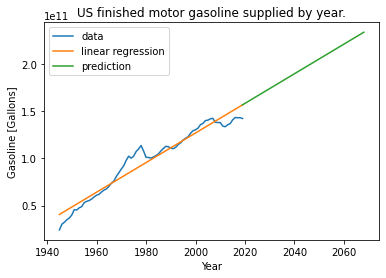

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv ('supplied-motor-gasoline.csv')

# To retrieve the data as lists
# date = df['date'].tolist()
# volume = df['finished-motor-gasoline-supplied(thousand-barrels)'].tolist()  # [thousand-barrels]

date = df.iloc[:, :1].values
volume = df.iloc[:, 1].values  # [thousand-barrels]
volume = 1e3*volume  # [barrels]
volume = 42*volume  # [gallons]

# To convert data to dictionary
# zip(list(np.transpose(date)[0]), list(volume))
# data = dict(zip(list(np.transpose(date)[0]), list(volume)))
# data

from sklearn.linear_model import LinearRegression
lin = LinearRegression() 
lin.fit(date, volume)

end = 50
future = np.arange(end).reshape(end, 1) + date[-1]

plt.plot(date, volume, label='data')
plt.plot(date, lin.predict(date), label='linear regression')
plt.plot(future, lin.predict(future), label='prediction')
plt.legend(loc="upper left")
plt.title('US finished motor gasoline supplied by year.')
plt.ylabel('Gasoline [Gallons]')
plt.xlabel('Year')
# plt.savefig("fuel-demand", dpi=300, bbox_inches="tight")

## Hydrogen Production

Deployment of new HTGRs that produce only Hydrogen.

Chosen HTGR: **GT-MHR**.

P = 600 MW$_{th}$

T$_{o}$ = 850 $^\circ$C

https://www-pub.iaea.org/MTCD/Publications/PDF/TE_1674_CD_web.pdf

The production meets the demand in year:  2168


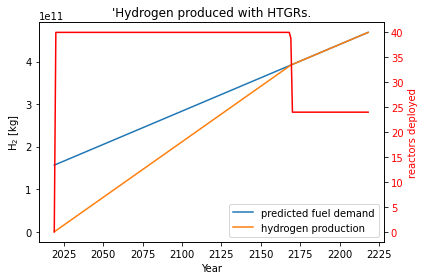

In [38]:
import hydrogen as h2

Pth = 600
pr = h2.hte1_prod_rate(Pth, 850)[1]  # [kg/h]
pr *= 365*24  # [kg/y]

end = 200
future = np.arange(end).reshape(end, 1) + date[-1]
fuel_demand = lin.predict(future)

rdr = 40*np.ones(end)  # reactor deployment rate
rdr[0] = 0
rdc = np.cumsum(rdr)  # reactor deployment cumulative

hydrogen = pr*rdc

for t in range(end):
    if hydrogen[t] < fuel_demand[t]:
        tintersect = t+future[0]
    else:
        hydrogen[t] = np.ceil(fuel_demand[t])
        rdc[t] = np.ceil(fuel_demand[t])/pr
        rdr[t] = rdc[t]-rdc[t-1]

print("The production meets the demand in year: ", tintersect[0])

fig, ax1 = plt.subplots()
ax1.plot(future, fuel_demand, label='predicted fuel demand')
ax1.plot(future, hydrogen, label='hydrogen production')
ax1.legend(loc="lower right")
ax1.set_title("'Hydrogen produced with HTGRs.", color="black")
ax1.set_ylabel('H$_2$ [kg]', color="black")
ax1.set_xlabel('Year')
ax2 = ax1.twinx()
ax2.plot(future, rdr, color='red')
ax2.set_ylabel('reactors deployed', color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()

## CO$_2$ savings

Burning a gallon of gasoline produces 19.64 lbs of CO$_2$.
For each kg-H_2 we are saving 19.64 lbs of CO$_2$.

Text(0.5, 0, 'Year')

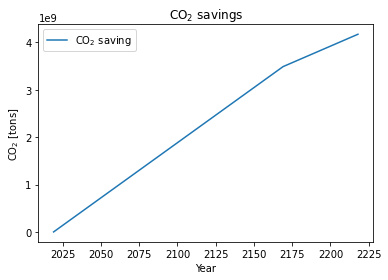

In [39]:
carbon = hydrogen*19.64  # [lbs]
carbon *= 0.453592  # [kg]
carbon /= 1000  # [metric tons]

plt.plot(future, carbon, label='CO$_2$ saving')
plt.legend(loc="upper left")
plt.title('CO$_2$ savings')
plt.ylabel('CO$_2$ [tons]')
plt.xlabel('Year')

## Future Work: D3ploy

D3ploy should be able to carry out this analysis on its own, but currently takes a function of time as the demand. If we can set this data as the demand in the initial years, then we wouldn't need the previous analysis.

D3ploy uses dictionaries. Retrieve the data and build a dictionary.

In [6]:
import pandas as pd
data = pd.read_csv('supplied-motor-gasoline.csv', header=0, index_col=0, squeeze=True).to_dict()

scaling = 42 * 1e3
total = {key: scaling * data[key] for key, values in data.items()}
print(total)

{1945: 24332406000.0, 1946: 30345504000.0, 1947: 32483136000.0, 1948: 35051100000.0, 1949: 36948282000.0, 1950: 40100466000.0, 1951: 45761772000.0, 1952: 45401580000.0, 1953: 47672646000.0, 1954: 48956334000.0, 1955: 53090688000.0, 1956: 54535992000.0, 1957: 55420554000.0, 1958: 56885262000.0, 1959: 59171784000.0, 1960: 61011552000.0, 1961: 61977132000.0, 1962: 64369536000.0, 1963: 66441732000.0, 1964: 67676616000.0, 1965: 70404768000.0, 1966: 73707144000.0, 1967: 76010886000.0, 1968: 80865834000.0, 1969: 84713790000.0, 1970: 88676658000.0, 1971: 92201256000.0, 1972: 98018676000.0, 1973: 102318552000.0, 1974: 100219392000.0, 1975: 102321576000.0, 1976: 107261028000.0, 1977: 110020680000.0, 1978: 113622936000.0, 1979: 107838066000.0, 1980: 101125374000.0, 1981: 100986816000.0, 1982: 100246608000.0, 1983: 101517528000.0, 1984: 102877362000.0, 1985: 104721162000.0, 1986: 107832270000.0, 1987: 110463738000.0, 1988: 112776132000.0, 1989: 112336140000.0, 1990: 110911164000.0, 1991: 110184648

## Analysis for different types of reactors and hydrogen production methods

**LWR** fleet Data:

Installed capacity (2019): 99.39 million kW [1].

96 reactors [2].


HTGR Data: Data correspond to **GT-MHR**

P = 600 MW$_{th}$ [3]

T$_o$  = 850 $^\circ$C [3]

References:

[1] https://www.eia.gov/electricity/monthly/current_month/epm.pdf

[2] https://www.eia.gov/tools/faqs/faq.php?id=207&t=3

[3] https://www-pub.iaea.org/MTCD/Publications/PDF/TE_1674_CD_web.pdf

### Future work
* Add more reactor types, maybe MSR and FBR. Efficiency for those?

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

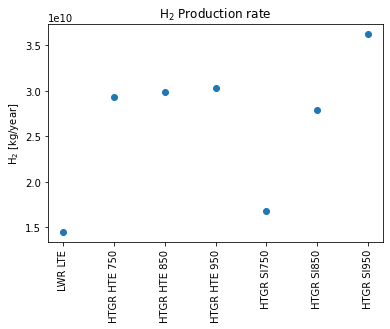

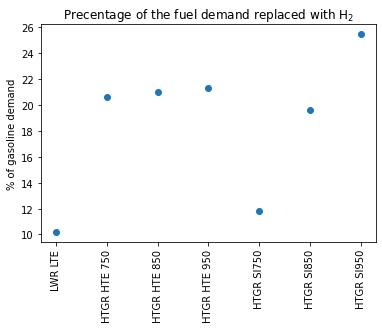

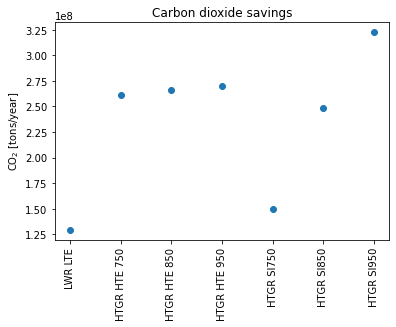

In [47]:
installed = 99.4e6  # [kW]
installed /= 1e3*0.33  # [MW-th]

carbon = hydrogen*19.64  # [lbs]
carbon *= 0.453592  # [kg]
carbon /= 1000  # [metric tons]

pr = []
fuel = []
carbon = []
xlab = []

pro = 365*24*h2.lte_prod_rate(installed, 0.33)[1]  # [kg/y]
pr.append(pro)
fuel.append(pr/volume[-1]*100)
carbon.append(pro*19.64*0.453592/1e3)  # [tons/y]
xlab.append('LWR LTE')

for tout in [750, 850, 950]:
    pro = 365*24*h2.hte1_prod_rate(installed, tout)[1]
    pr.append(pro)  # [kg/y]
    fuel.append(pro/volume[-1]*100)
    carbon.append(pro*19.64*0.453592/1e3)  # [tons/y]
    xlab.append('HTGR HTE '+ str(tout))

for tout in [750, 850, 950]:
    pro = 365*24*h2.si_prod_rate(installed, tout)[1]  # [kg/y]
    pr.append(pro)  # [kg/y]
    fuel.append(pro/volume[-1]*100)
    carbon.append(pro*19.64*0.453592/1e3)  # [tons/y]
    xlab.append('HTGR SI' + str(tout))
    
plt.figure(1)
plt.scatter(xlab, pr, marker='o')
plt.title('H$_2$ Production rate')
plt.ylabel('H$_2$ [kg/year]')
plt.xticks(rotation=90)

plt.figure(2)
plt.scatter(xlab, fuel, marker='o')
plt.title('Precentage of the fuel demand replaced with H$_2$')
plt.ylabel('% of gasoline demand')
plt.xticks(rotation=90)

plt.figure(3)
plt.scatter(xlab, carbon, marker='o')
plt.title('Carbon dioxide savings')
plt.ylabel('CO$_2$ [tons/year]')
plt.xticks(rotation=90)

# Off-peak hydrogen production

(duck curve)

### Future work:
* By state ?
* Economics: Company (e.g. Exelon) cells H2 to transportation during off peak